# **Task : Disease Prediction**

    DATASETS : Health attributes dataset aids disease diagnosis.

    OBJECTIVES : Develop ML model for accurate
    classification of diseased vs. non-diseased individuals.

    DATA INCLUDES : Attributes include cholesterol, blood cell
    counts, hormone levels, and more.

    TASK : Build predictive model; evaluate using accuracy, precision, recall, and F1-score.

    OUTCOME : Develop tool for early disease detection, improving patient outcomes
    and reducing healthcare costs.

In [ ]:
#Mount your drive having train and test files(.csv)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Disease
Anemia      623
Healthy     556
Diabetes    540
Thalasse    509
Thromboc    123
Name: count, dtype: int64


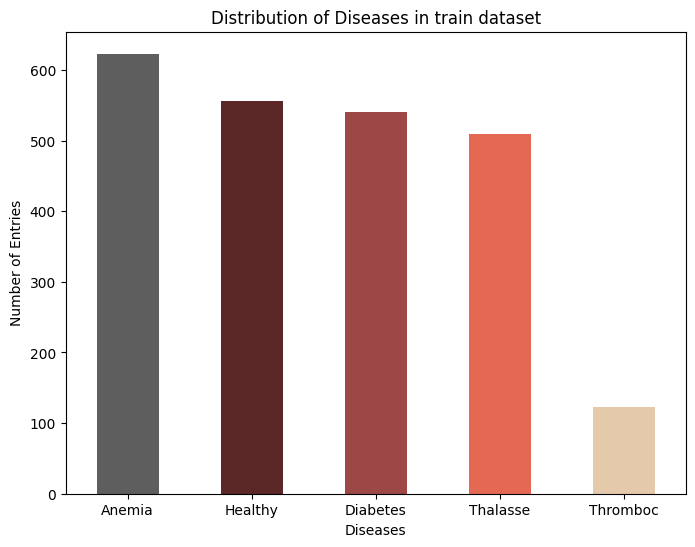

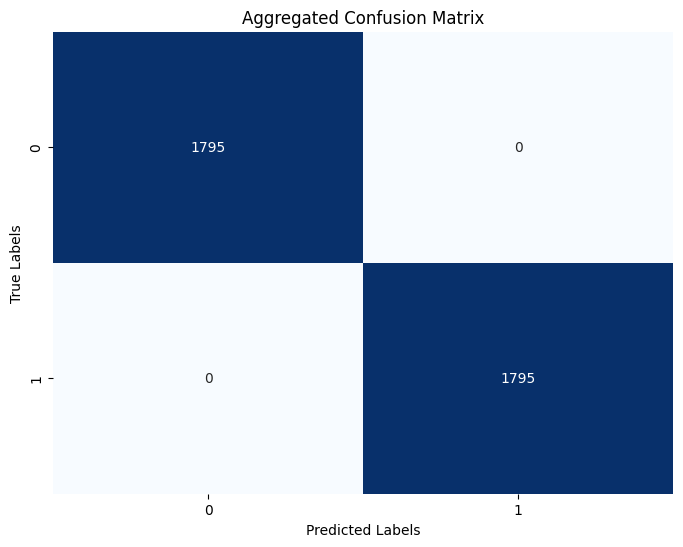

Performance Metrics for Each Fold:
Fold 1:
Confusion Matrix:
[[353   0]
 [  0 365]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Fold 2:
Confusion Matrix:
[[353   0]
 [  0 365]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Fold 3:
Confusion Matrix:
[[359   0]
 [  0 359]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Fold 4:
Confusion Matrix:
[[358   0]
 [  0 360]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Fold 5:
Confusion Matrix:
[[372   0]
 [  0 346]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Average Performance Metrics:
Average Accuracy: 1.0
Average Precision: 1.0
Average Recall: 1.0
Average F1 Score: 1.0
Unhealthy
1    1795
0     556
Name: count, dtype: int64
Unhealthy
1    1449
0    1423
Name: count, dtype: int64
Unhealthy
0    1795
1    1795
Name: count, dtype: int64


In [29]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_csv('/content/drive/My Drive/Mentorness/Train_data.csv')

class_counts_data = data['Disease'].value_counts()
print(class_counts_data)

# Handle missing values (example: filling with mean value)
X.fillna(X.mean(), inplace=True)

# Plotting using matplotlib
plt.figure(figsize=(8, 6))
class_counts_data.plot(kind='bar', color=['#5e5e5e', '#5c2727', '#9d4747', '#e56852', '#e4c9ab'])
plt.title('Distribution of Diseases in train dataset')
plt.xlabel('Diseases')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
plt.show()

condition = data['Disease'] != 'Healthy'
data['Unhealthy']=condition.astype(int)
data.drop(columns=['Disease'], inplace=True)

X=data.iloc[:, :-1 ]
y=data.iloc[:, -1]

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
svm = SVC(kernel='rbf', gamma='scale')

# Lists to store performance metrics for each fold
conf_matrices = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(X_resampled):
    # Split the data into training and validation sets
    X_train = X_resampled.iloc[train_index]
    X_test = X_resampled.iloc[test_index]
    y_train = y_resampled.iloc[train_index]
    y_test = y_resampled.iloc[test_index]

    # Train the model
    svm.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = svm.predict(X_test)

    # Calculate performance metrics for this fold
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store performance metrics for this fold
    conf_matrices.append(conf_matrix)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Aggregate the confusion matrices across all folds
agg_conf_matrix = np.sum(conf_matrices, axis=0)

# Calculate the average performance metrics across all folds
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

print("\n\n")

# Plot the aggregated confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(agg_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Aggregated Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the performance metrics for each fold
print("Performance Metrics for Each Fold:")
for i in range(k):
    print(f"Fold {i+1}:")
    print("Confusion Matrix:")
    print(conf_matrices[i])
    print("Accuracy:", accuracy_scores[i])
    print("Precision:", precision_scores[i])
    print("Recall:", recall_scores[i])
    print("F1 Score:", f1_scores[i])
    print()

# Print the average performance metrics across all folds
print("Average Performance Metrics:")
print("Average Accuracy:", average_accuracy)
print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)

print(data['Unhealthy'].value_counts())
print(y_train.value_counts())
print(y_resampled.value_counts())

In [5]:
data

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Unhealthy
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,0
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,1
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,1
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,1
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,1
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,1
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,1
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,1


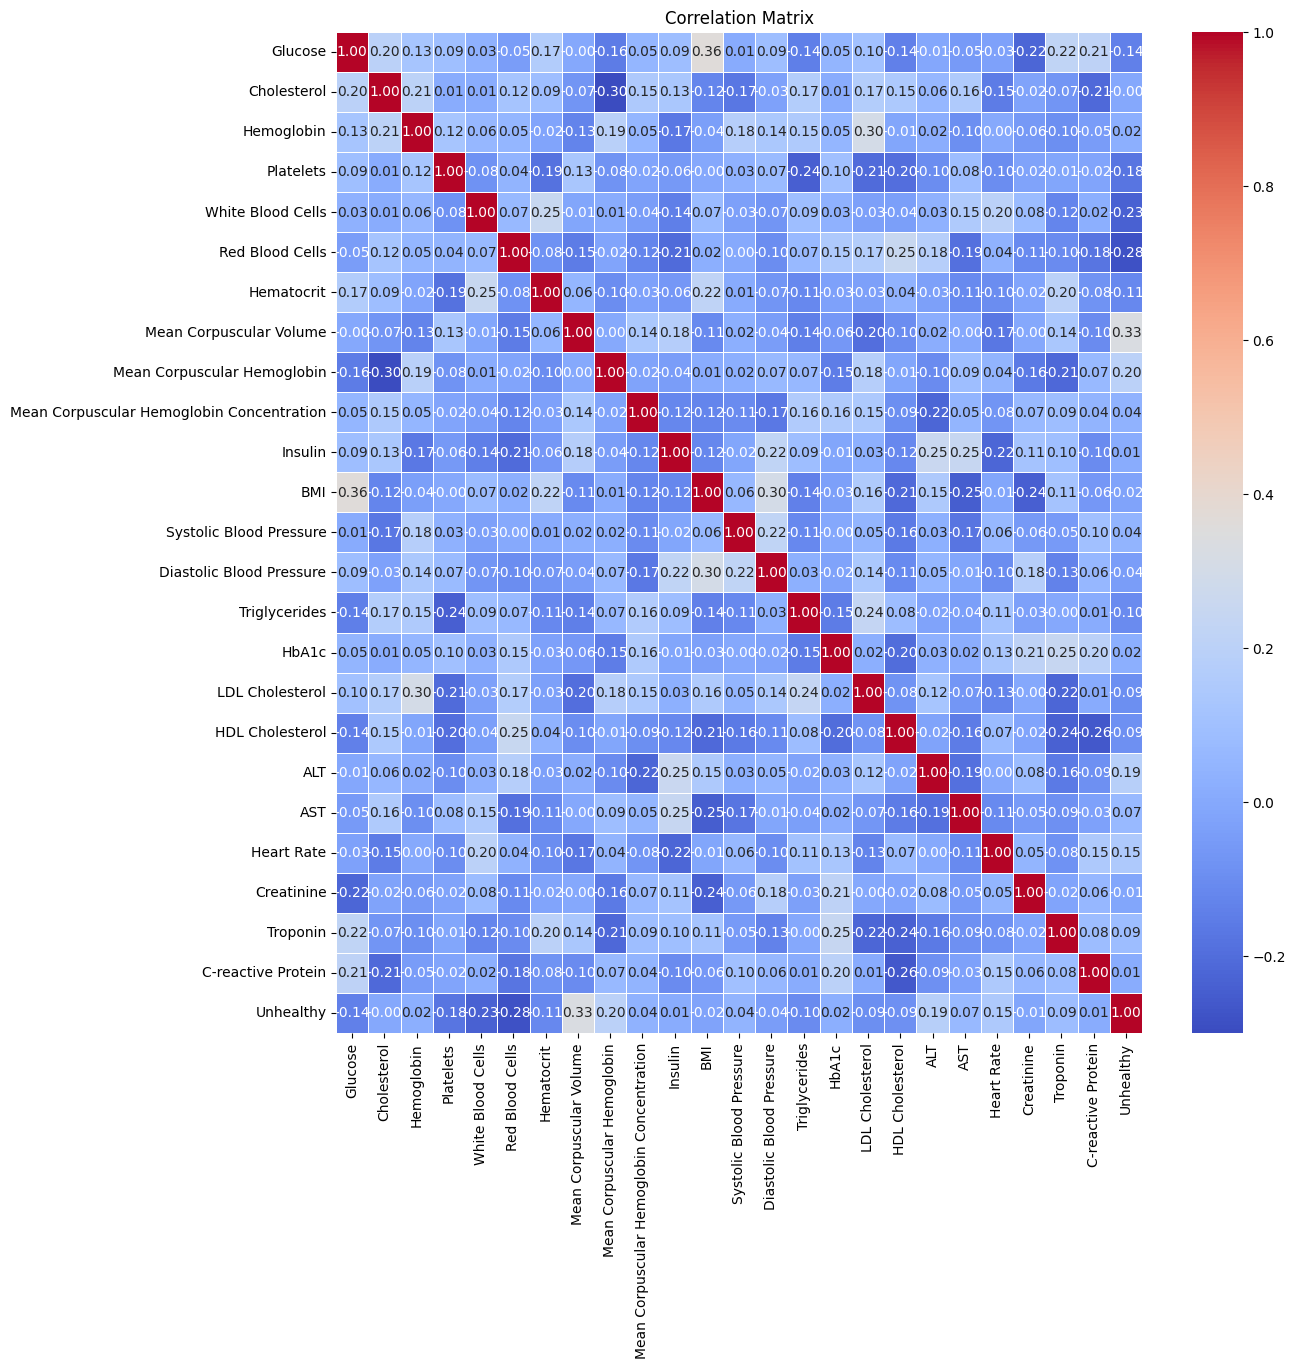

Unhealthy
1    1795
0     556
Name: count, dtype: int64


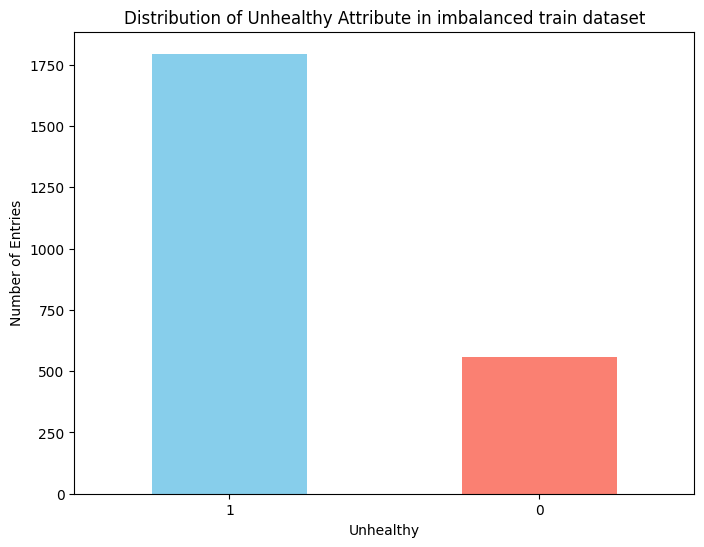

Unhealthy
0    1795
1    1795
Name: count, dtype: int64


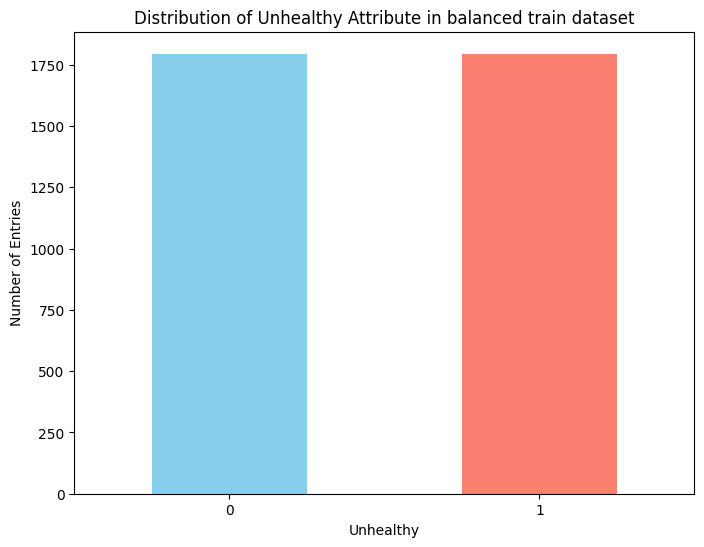

In [30]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(13, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Count the number of entries in each class Imbalanced Data
class_counts = y.value_counts()
print(class_counts)

# Plotting using matplotlib
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Unhealthy Attribute in imbalanced train dataset')
plt.xlabel('Unhealthy')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
plt.show()

# Count the number of entries in each class in Balanced Data
class_counts = y_resampled.value_counts()
print(class_counts)

# Plotting using matplotlib
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Unhealthy Attribute in balanced train dataset')
plt.xlabel('Unhealthy')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
plt.show()

Disease
Diabetes    294
Anemia       84
Thalasse     48
Heart Di     39
Thromboc     16
Healthy       5
Name: count, dtype: int64


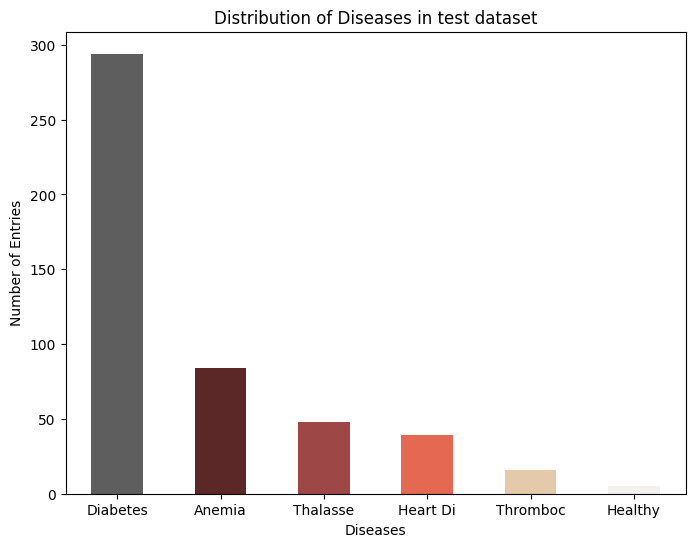

      Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0    0.001827     0.033693    0.114755   0.997927           0.562604   
1    0.436679     0.972653    0.084998   0.180909           0.675736   
2    0.545697     0.324815    0.584467   0.475748           0.558596   
3    0.172994     0.050351    0.736000   0.782022           0.069435   
4    0.758534     0.739968    0.597868   0.772683           0.875720   
..        ...          ...         ...        ...                ...   
481  0.985163     0.412960    0.529993   0.263765           0.431288   
482  0.581914     0.629325    0.491644   0.901473           0.347797   
483  0.066669     0.404558    0.591041   0.228401           0.127461   
484  0.901444     0.430680    0.243853   0.825551           0.493884   
485  0.877912     0.597809    0.730440   0.462307           0.498438   

     Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0           0.866499    0.578042                 0.914615   
1           0

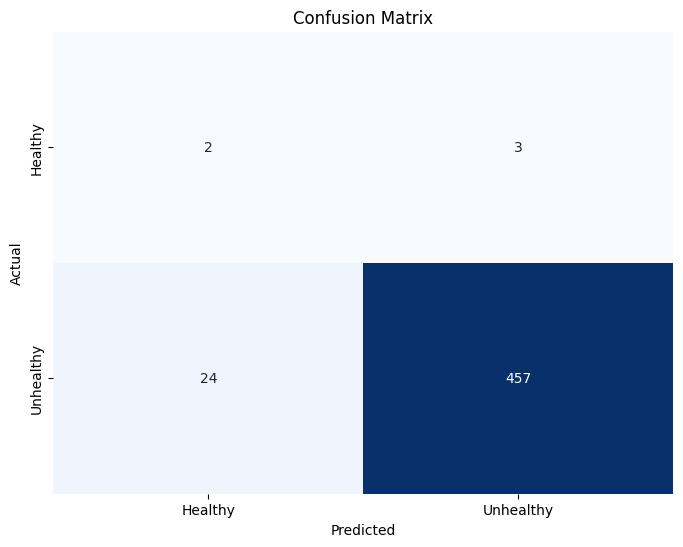

              precision    recall  f1-score   support

           0       0.08      0.40      0.13         5
           1       0.99      0.95      0.97       481

    accuracy                           0.94       486
   macro avg       0.54      0.68      0.55       486
weighted avg       0.98      0.94      0.96       486



In [31]:
testData= pd.read_csv('/content/drive/My Drive/Mentorness/test_data.csv')

class_counts_testData = testData['Disease'].value_counts()
print(class_counts_testData)

# Plotting using matplotlib
plt.figure(figsize=(8, 6))
class_counts_testData.plot(kind='bar', color=['#5e5e5e', '#5c2727', '#9d4747', '#e56852', '#e4c9ab', '#f3f0ef'])
plt.title('Distribution of Diseases in test dataset')
plt.xlabel('Diseases')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
plt.show()

testCondition = testData['Disease'] != 'Healthy'
testData['Unhealthy']=testCondition.astype(int)
testData.drop(columns=['Disease'], inplace=True)
# print(testData)
X_test = testData.iloc[:, :-1 ]
y_test = testData.iloc[:,-1]
print(X_test)
print(y_test)

y_predTest = svm.predict(X_test)

accuracyTest = accuracy_score(y_test, y_predTest)
f1Test = f1_score(y_test, y_predTest)
precisionTest = precision_score(y_test, y_predTest)
recallTest = recall_score(y_test, y_predTest)
print(f"Accuracy: {accuracyTest:.2f}")
print(f"Precision: {precisionTest:.2f}")
print(f"Recall: {recallTest:.2f}")
print(f"F1 Score: {f1Test:.2f}")

cm = confusion_matrix(y_test, y_predTest)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Healthy', 'Unhealthy'], yticklabels=['Healthy', 'Unhealthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_predTest))